# **Домашнее задание**

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Подсказка
9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [129]:
churn=pd.read_csv('/content/drive/MyDrive/data/churn.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Столбцы таблицы:**

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [3]:
churn=churn.drop('RowNumber', axis=1)

**9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**

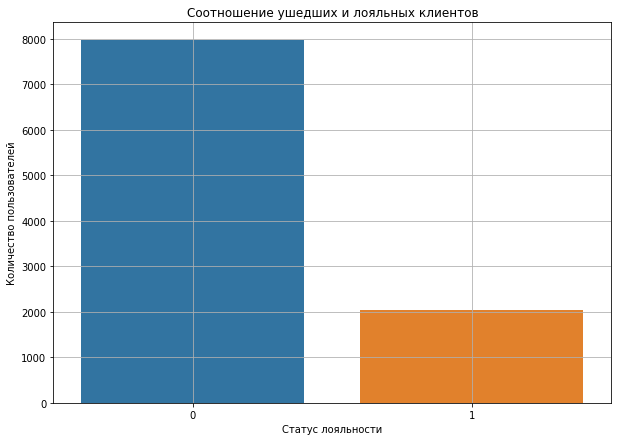

In [109]:
fig=plt.figure(figsize=(10,7))
countplot=sns.countplot(data=churn, x='Exited')
countplot.set_title('Cоотношение ушедших и лояльных клиентов')
countplot.set_xlabel('Статус лояльности')
countplot.set_ylabel('Количество пользователей')
countplot.grid()

Таким образом, доля ушедших клиентов (1) составляет 25% относительно количества лояльных клиентов (0), что является существенным оттоком и нуждается в дополнительном исследовании.

**9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**

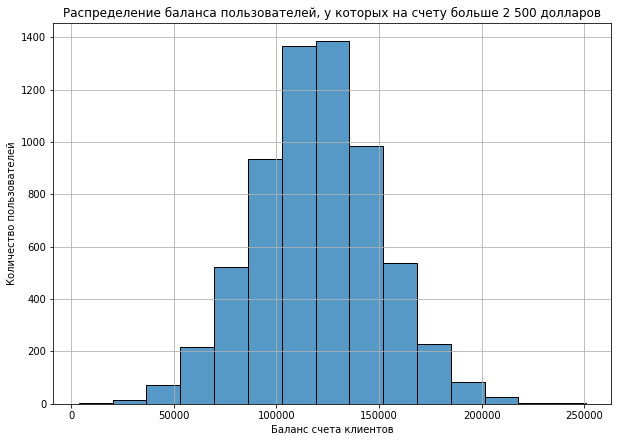

In [110]:
balance_cropped=churn[churn['Balance']>2500]
fig=plt.figure(figsize=(10,7))
histplot=sns.histplot(data=balance_cropped, x='Balance', bins=15)
histplot.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов')
histplot.set_xlabel('Баланс счета клиентов')
histplot.set_ylabel('Количество пользователей')
histplot.grid()

Из графика отчетливо видно, что при выборке Balance>2500 долларов большинствo клиентов держат на счетах от 95000 до 130000 долларов. Распределение похоже на нормальное. 

Сравним данные показатели с полным распределением финансов на счетах.

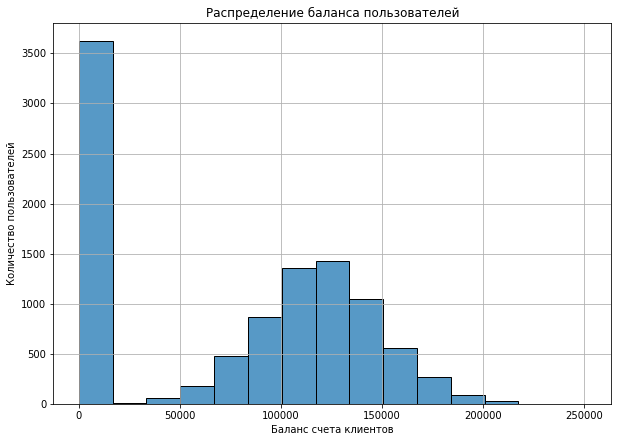

In [111]:
fig=plt.figure(figsize=(10,7))
histplot=sns.histplot(data=churn, x='Balance', bins=15)
histplot.set_title('Распределение баланса пользователей')
histplot.set_xlabel('Баланс счета клиентов')
histplot.set_ylabel('Количество пользователей')
histplot.grid()

Наше распределение существенно изменилось. Таким образом значительное количество клиентов держат на счетах сумму менее 2500 долларов, что может свидетельствовать о том, что часть клиентов предпочитает для хранения средств другие банки. Стоит работать в сторону увеличения уровня доверия.


**9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**

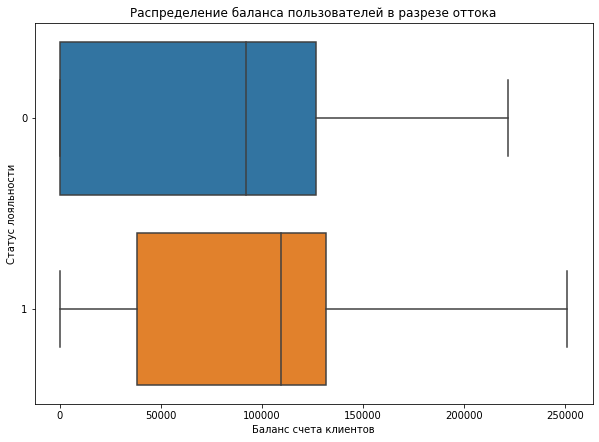

In [115]:
fig=plt.figure(figsize=(10,7))
boxplot=sns.boxplot(data=churn, x='Balance', y='Exited', orient='h')
boxplot.set_title('Распределение баланса пользователей в разрезе оттока')
boxplot.set_xlabel('Баланс счета клиентов')
boxplot.set_ylabel('Статус лояльности');

Размер ящика для ушедших пользователей меньше чем для лояльных. Стоит отметить, что медианный баланс у ушедших пользователей выше (110000) при 90000 у лояльных. Таким образом, стоит улучшать условия для держателей счетов с балансом от 100000 и выше. Например, путем повышения кэшбека на остаток.

**9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**

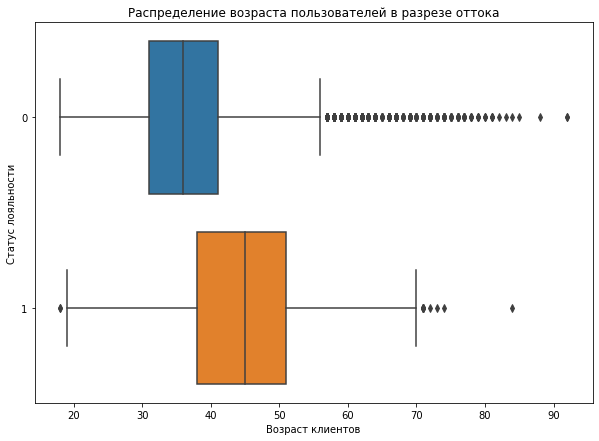

In [116]:
fig=plt.figure(figsize=(10,7))
boxplot=sns.boxplot(data=churn, x='Age', y='Exited', orient='h')
boxplot.set_title('Распределение возраста пользователей в разрезе оттока')
boxplot.set_xlabel('Возраст клиентов')
boxplot.set_ylabel('Статус лояльности');

Наблюдаем интересную картину: средний возраст лояльных клиентов банка-35 лет. Для ушедших клиентов-45 лет. Потенциальных выбросов значительно больше в группе лояльных клиентов. Вывод: среди лояльных клиентов практически отсутствует возрастная прослойка 40-50 лет. Стоит разработать стратегию по привлечению клиентов данной возрастной группы.

**9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**

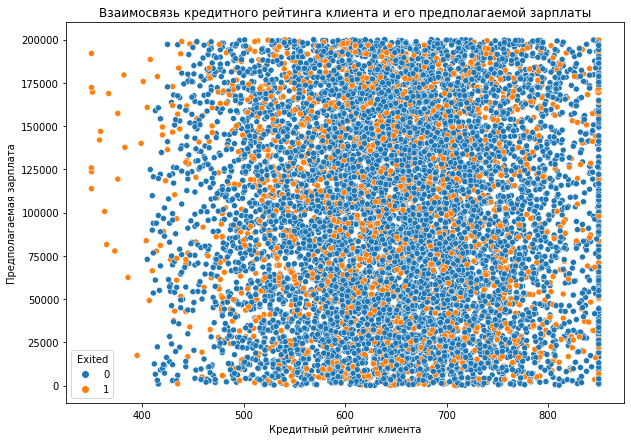

In [118]:
fig=plt.figure(figsize=(10,7))
scatterplot=sns.scatterplot(data=churn, x='CreditScore', y='EstimatedSalary', hue='Exited')
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты')
scatterplot.set_xlabel('Кредитный рейтинг клиента')
scatterplot.set_ylabel('Предполагаемая зарплата');

Никакой взаимосвязи между признаками не наблюдается. Стоит отметить, что клиенты с крайне низким кредитным рейтингом находятся в числе ушедших.

**9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**

In [147]:
d={'Male':0, 'Female':1}
churn['Gender']=churn['Gender'].apply(lambda x:d[x])

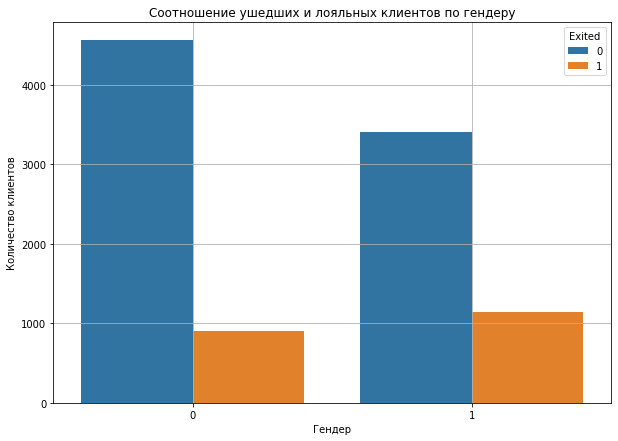

In [148]:
fig=plt.figure(figsize=(10,7))
countplot=sns.countplot(data=churn, x='Gender', hue='Exited')
countplot.set_title('Cоотношение ушедших и лояльных клиентов по гендеру')
countplot.set_xlabel('Гендер')
countplot.set_ylabel('Количество клиентов')
countplot.grid()

Присутствует незначительный перевес в пользу ушедших женщин. Среди лояльных клиентов также доминируют мужчины. Стоит обратить внимание на то, почему женщин среди пользователей меньше. Возможно, спецпредложения, предусмотренные маркетинговой стратегией не актуальны для женской аудитории.

**9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.**

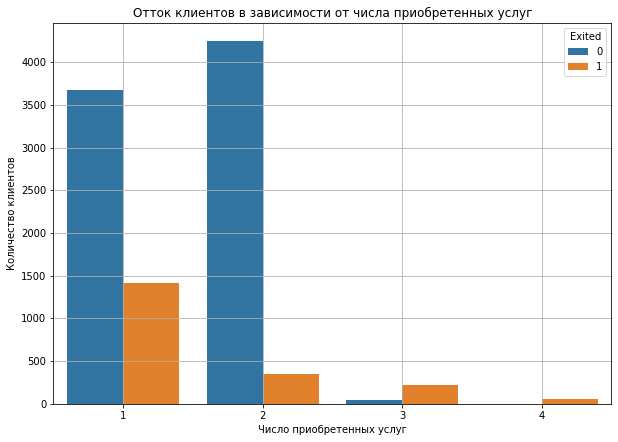

In [140]:
fig=plt.figure(figsize=(10,7))
countplot=sns.countplot(data=churn, x='NumOfProducts', hue='Exited')
countplot.set_title('Отток клиентов в зависимости от числа приобретенных услуг')
countplot.set_xlabel('Число приобретенных услуг')
countplot.set_ylabel('Количество клиентов')
countplot.grid()

Таким образом, большинство ушедших клиентов пользовались лишь одним продуктом банка. Большинство лояльных клиентов также использует лишь 2 продукта. Возможно, стоит увеличить осведомленность пользователей о других выгодных предложениях посредством промо-предложений, почтовых рассылок или push-уведомлений.

**9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**

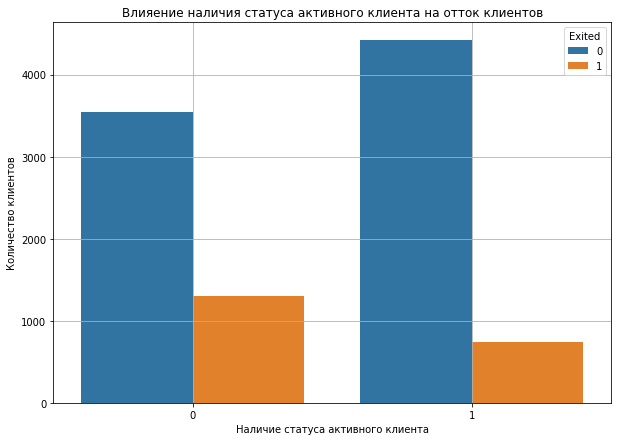

In [141]:
fig=plt.figure(figsize=(10,7))
countplot=sns.countplot(data=churn, hue='Exited', x='IsActiveMember')
countplot.set_title('Влияение наличия статуса активного клиента на отток клиентов')
countplot.set_xlabel('Наличие статуса активного клиента')
countplot.set_ylabel('Количество клиентов')
countplot.grid()

Статус активного клиента снижает отток. Стоит повышать клиентскую вовлеченность. Это возможно, например, посредством создания бонусной системы, поощряющей пользовательскую активность.

**9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**

In [101]:
countries_data = (
churn
.groupby(by='Geography', as_index=False)['Exited']
.sum()
)

fig = px.choropleth(
data_frame = countries_data,
locations = "Geography",
locationmode = "country names",
color = "Exited",
title = 'Доля ушедших клиентов',
width = 800,
height = 500,
)

fig.show()


График не отображается на гитхабе:(

Не знаю, как это поправить, поэтому просто прикрепляю скрин
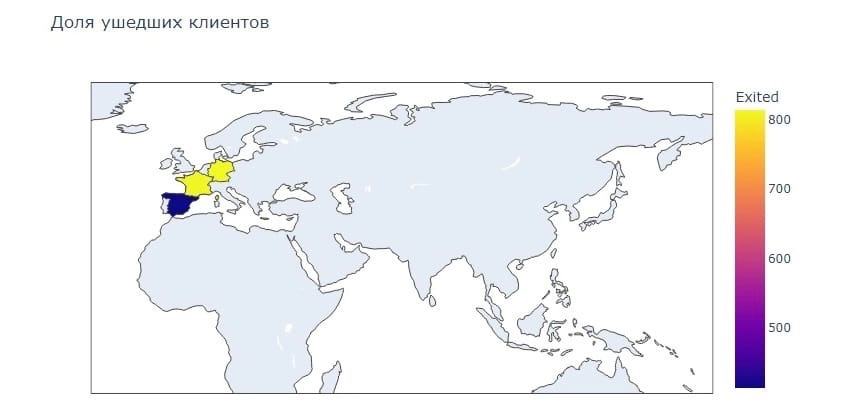

Наибольший отток клиентов наблюдается во Франции и Германии. 

Это может быть связано как с высокой конкуренцией в банковском секторе в этих странах, так и с неудачным продуктовым позиционированием, которое не согласуется с культурой стран. Стоит глубже изучить рынок продуктов и философию брендов банков-конкурентов.

**9.10 Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей. На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.**

In [143]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn['CreditScoreCat'] = churn['CreditScore'].apply(get_credit_score_cat)

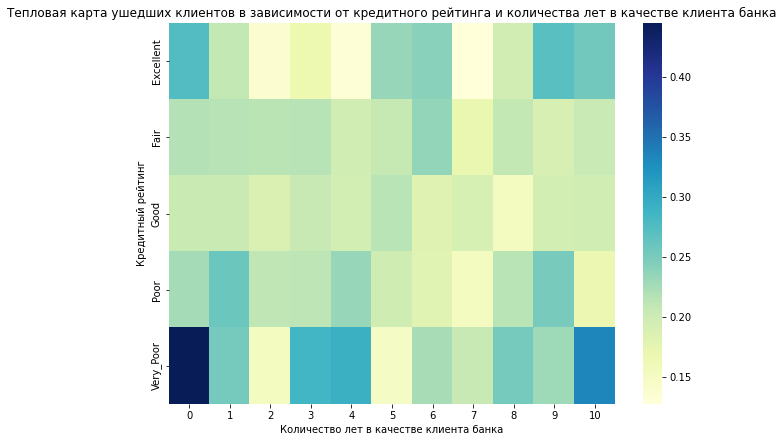

In [146]:
pivot = churn.groupby(['Tenure', 'CreditScoreCat'], as_index=False).Exited.mean().pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat')
fig=plt.figure(figsize=(10,7))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта ушедших клиентов в зависимости от кредитного рейтинга и количества лет в качестве клиента банка')
heatmap.set_xlabel('Количество лет в качестве клиента банка')
heatmap.set_ylabel('Кредитный рейтинг');

Таким образом, чаще и быстрее всего уходят клиенты с низким кредитным рейтингом. Возможно, им не был одобрен кредитный продукт, на который они рассчитывали. Далее следуют клиенты с низким кредитным рейтингом, являвшиеся клиентами банка в течение 10 лет. Возможно, это отток пользователей, закрывших свой кредит. Заслуживают внимания пользователи с отличным кредитным рейтингом, которые также часто покидают банк в нулевом или девятилетнем отрезке пользования услугами. Удержание этой категории пользователей является нашей основной задачей. Стоит задуматься о введении дополнительных привилегий для надежных клиентов. Например, посредством введения промо-предложений по быстрой выдаче определенной суммы в кредит.